In [7]:
import os
import copy

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

from complex_network.networks import network_factory
from complex_network.networks.network_spec import NetworkSpec
from complex_network.networks.network_perturbator import (
    NetworkPerturbator,
)
from complex_network.networks import pole_finder

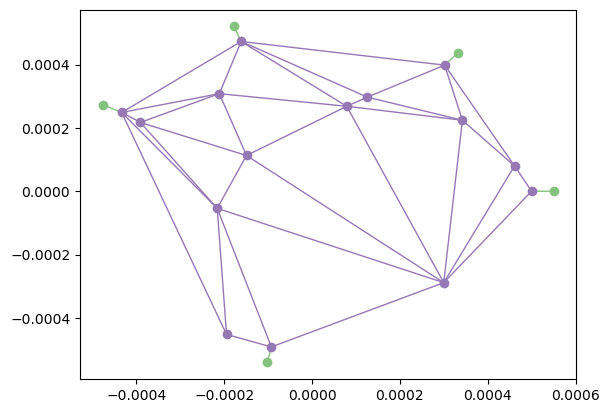

In [2]:
# Generate the random network
np.random.seed(1)
spec = NetworkSpec(
    network_type="delaunay",
    network_shape="circular",
    num_seed_nodes=0,
    external_offset=0.0,
    num_internal_nodes=15,
    num_external_nodes=5,
    network_size=500e-6,
    external_size=550e-6,
    node_S_mat_type="COE",
    node_S_mat_params={},
)
network = network_factory.generate_network(spec)
network.draw()
safe_copy = copy.deepcopy(network)
temp = copy.deepcopy(network)

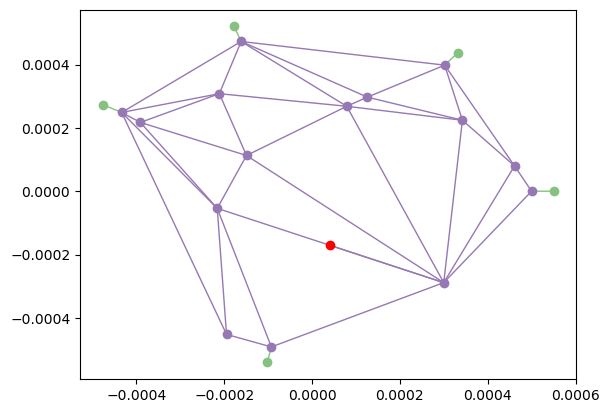

In [3]:

temp.add_node_to_link(9, 0.5, 1.0)
temp.draw()
# Add the pseudo_node
network.add_node_to_link(9, 0.5, 0.0)


In [4]:
# Set up perturbator and track a pole
perturbator = NetworkPerturbator(network)

r_values = np.linspace(0.0, 1, 1000)
node_index = 15

pole = 12532230.332102112 - 11.136143180724291j

root = (
    "/home/nbyrnes/code/networklibrary/presentations/25-04-2024_code_review/"
)
data = "data/"
output = "output/"
path_direct = root + data + "poles_direct_one.npy"
path_wigner = root + data + "poles_wigner_one.npy"

# if not os.path.exists(path_direct) or not os.path.exists(path_direct):
poles, pole_shifts = perturbator.perturb_pseudonode_r_iterative(
    pole, node_index, r_values
)

poles_direct = np.array(poles["direct"])
poles_wigner = np.array(poles["wigner"])
#     np.save(path_direct, poles_direct)
#     np.save(path_wigner, poles_wigner)
# else:
#     poles_direct = np.load(path_direct)
#     poles_wigner = np.load(path_wigner)

100%|██████████| 1000/1000 [02:15<00:00,  7.35it/s]


5.013620324918647e-07
5.013623125326577e-07


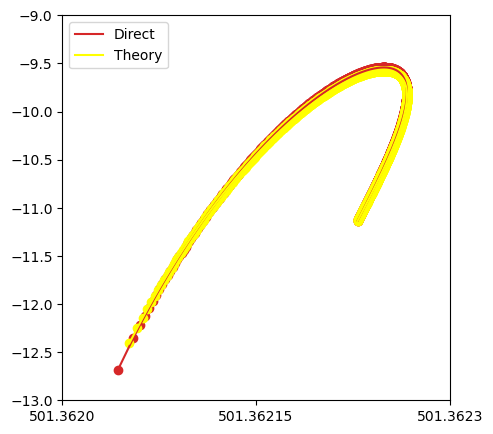

In [32]:
# Show plot of the pole motion
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(np.real(poles_direct), np.imag(poles_direct), color="tab:red", label="Direct")
ax.scatter(np.real(poles_direct), np.imag(poles_direct), color="tab:red")
ax.plot(np.real(poles_wigner), np.imag(poles_wigner), color="yellow", label="Theory")
ax.scatter(np.real(poles_wigner), np.imag(poles_wigner), color="yellow")

kr_min = 25 + 1.25322e7
kr_max = 32 + 1.25322e7
ki_min = -13
ki_max = -9

lam_min = 2 * np.pi / kr_max
lam_max = 2 * np.pi / kr_min
print(lam_min)
print(lam_max)
x_ticks = np.linspace(kr_min, kr_max, 3)
x_ticklabels = ["501.3620", "501.36215", "501.3623"]


ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)
ax.set_ylim(ki_min, ki_max)
ax.set_xlim(kr_min, kr_max)
ax.set_aspect("auto")
ax.legend()
fig.savefig(root + output + "poles.svg")

In [8]:
# Heat map
k0_min = kr_min + 1j*ki_min
k0_max = kr_max + 1j*ki_max
k0_r, k0_i, data = pole_finder.sweep(k0_min, k0_max, 100, network)

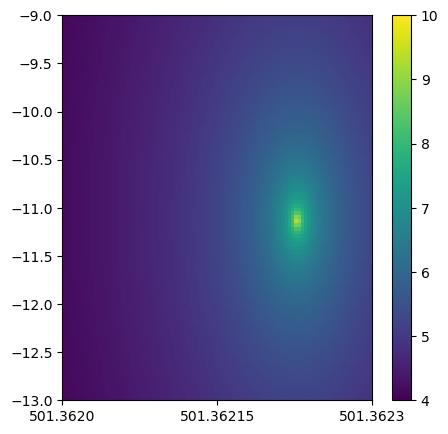

In [46]:
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(-np.log(data), extent=[kr_min, kr_max, ki_max, ki_min], vmin=4, vmax=10)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)
ax.set_ylim(ki_min, ki_max)
ax.set_xlim(kr_min, kr_max)
ax.set_aspect("auto")

cbar = fig.colorbar(im, ax=ax)
ticks = [4, 5, 6, 7, 8,9, 10]
tick_labels = [str(tick) for tick in ticks]
cbar.set_ticks(ticks)
cbar.set_ticklabels(tick_labels)
fig.savefig(root + output + "background.svg")

In [6]:
# # Create animation showing off data
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
# ax2.set_ylim(ki_min, ki_max)
# ax2.set_xlim(kr_min, kr_max)
# ax3.set_ylim(ki_min, ki_max)
# ax3.set_xlim(kr_min, kr_max)
# ax4.set_ylim(ki_min, ki_max)
# ax4.set_xlim(kr_min, kr_max)
# ax2.set_xticks(x_ticks)
# ax2.set_xticklabels(x_ticklabels)
# ax3.set_xticks(x_ticks)
# ax3.set_xticklabels(x_ticklabels)
# ax4.set_xticks(x_ticks)
# ax4.set_xticklabels(x_ticklabels)
# plt.subplots_adjust(
#     left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.5, hspace=0.5
# )

# ax2.set_title("Direct")
# ax3.set_title("Wigner-Smith")
# ax4.set_title("Both")


# ax2.set_xlabel("Wavelength (nm)")
# ax2.set_ylabel("Im(k0)")

# ax3.set_xlabel("Wavelength (nm)")
# ax3.set_ylabel("Im(k0)")

# ax4.set_xlabel("Wavelength (nm)")
# ax4.set_ylabel("Im(k0)")

# num_frames = len(r_values)

# # Set up initial line objects and store them in dictionaries
# (top_right,) = ax2.plot(
#     np.real(poles_direct), np.imag(poles_direct), color="tab:blue"
# )
# (bottom_left,) = ax3.plot(
#     np.real(poles_wigner), np.imag(poles_wigner), color="tab:orange"
# )
# (bottom_right_direct,) = ax4.plot(
#     np.real(poles_direct),
#     np.imag(poles_direct),
#     color="tab:blue",
#     label="Direct",
# )
# (bottom_right_wigner,) = ax4.plot(
#     np.real(poles_wigner),
#     np.imag(poles_wigner),
#     color="tab:orange",
#     label="Wigner-Smith",
# )
# ax4.legend(loc="lower right", fontsize=8)

# # Initialise network plot and set up perturbator just for the sake of the figure
# animation_perturbator = NetworkPerturbator(safe_copy)
# network.draw(ax1)

# data_dict = {"direct": poles_direct, "wigner": poles_wigner}
# line_dict = {
#     "top_right": top_right,
#     "bottom_left": bottom_left,
#     "bottom_right_direct": bottom_right_direct,
#     "bottom_right_wigner": bottom_right_wigner,
# }


# def update(frame, data_dict, line_dict, r_values, ax):
#     """Update function for producing the animation"""

#     # Unpack data
#     top_right = line_dict.get("top_right")
#     bottom_left = line_dict.get("bottom_left")
#     bottom_right_direct = line_dict.get("bottom_right_direct")
#     bottom_right_wigner = line_dict.get("bottom_right_wigner")
#     poles_direct = data_dict.get("direct")
#     poles_wigner = data_dict.get("wigner")

#     # Top right plot
#     top_right.set_data(
#         np.real(poles_direct)[:frame], np.imag(poles_direct)[:frame]
#     )

#     # Bottom left plot
#     bottom_left.set_data(
#         np.real(poles_wigner)[:frame], np.imag(poles_wigner)[:frame]
#     )

#     # Bottom right plot
#     bottom_right_direct.set_data(
#         np.real(poles_direct)[:frame], np.imag(poles_direct)[:frame]
#     )
#     bottom_right_wigner.set_data(
#         np.real(poles_wigner)[:frame], np.imag(poles_wigner)[:frame]
#     )

#     # Network plot
#     ax.clear()
#     animation_perturbator.perturbed_network.add_node_to_link(
#         9, 0.5, r_values[frame]
#     )
#     animation_perturbator.perturbed_network.draw(
#         ax, hide_axes=True, title=f"r = {r_values[frame]:.2f}"
#     )
#     animation_perturbator.reset()


# ani = animation.FuncAnimation(
#     fig,
#     update,
#     num_frames,
#     interval=100,
#     fargs=[data_dict, line_dict, r_values, ax1],
# )
# ani.save(
#     root + output + "pseudonode_r_one.mp4",
#     extra_args=["-vcodec", "libx264"],
#     fps=50,
# )
# fig.savefig(root + output + "pseudonode_r_final_one.png")